In [0]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from mpl_toolkits import mplot3d

from ipywidgets import interact,interactive, fixed, interact_manual
import ipywidgets as widget
from IPython.display import HTML
from matplotlib import animation, rc

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd /content/gdrive/My Drive/AML/Projects/GD_v1

/content/gdrive/My Drive/AML/Projects/GD_v1


In [4]:
ls

gd_m_camel_fn.ipynb              gd.py                  untitled
gd_pv_camel_fn.ipynb             gd_rms_camel_fn.ipynb  Unused_code.ipynb
gd_pv_camel_fn_oldversion.ipynb  __pycache__/


In [0]:
import gd

In [0]:
n_iter=500
starting_pt=[1.,1.]
eta=0.029
tol=1e-5

gdpv=gd.gdcls()
result=gdpv.gd_pv_result(n_iter,starting_pt,eta,tol)

In [12]:
result['speed']

36

In [0]:
#result['x_op']

In [0]:
#result['min_value']

In [0]:
#result['x1_path']

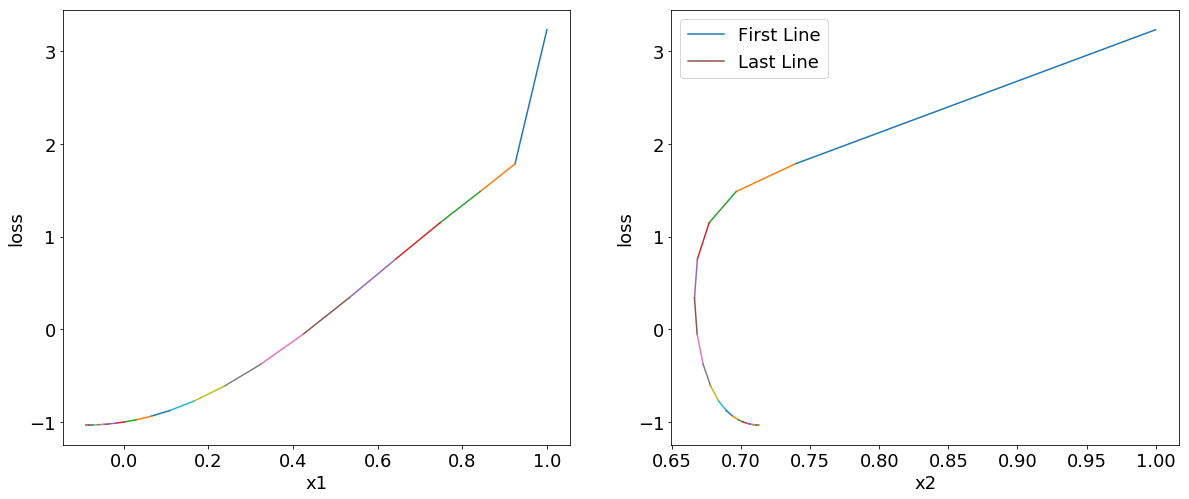

In [16]:
gdpv.plot2Dpath(0)

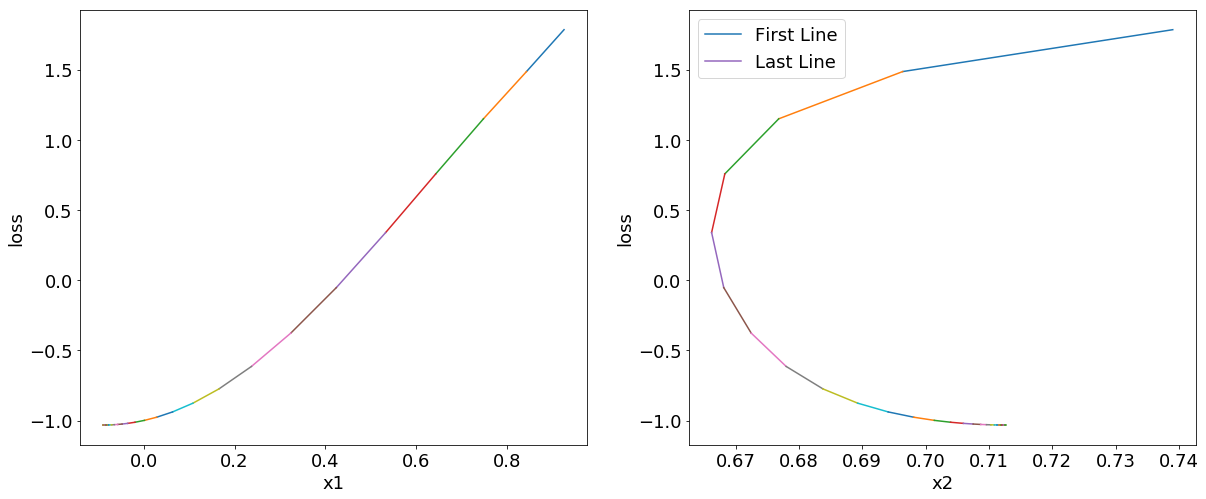

In [17]:
gdpv.plot2Dpath(1)

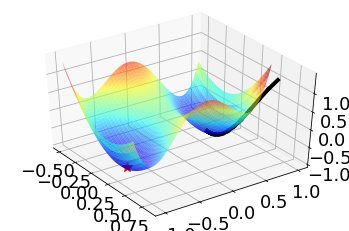

In [18]:
#x1 = np.linspace(-0.2, 0.1, 50)
#x2 = np.linspace(0.6, 0.9 ,50)

x1 = np.linspace(-0.5, 0.5, 50)
x2 = np.linspace(-1, 1 ,50)

#x1 = np.linspace(-0.02, 0.15, 20)
#x2 = np.linspace(-0.85,- 0.4 ,20)

x1, x2 = np.meshgrid(x1, x2)

t1=(4-2.1*x1**2+x1**4/3)*x1**2
t2=x1*x2
t3=(-4+4*x2**2)*x2**2
z = t1+t2+t3



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.6, linewidth=0)
#ax.plot_wireframe(x1,x2, z, color='grey')
ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)


x1p=result['x1_path']
x2p=result['x2_path']
zp=result['min_value_path']
n=len(zp)
for i in np.arange(2,n-1):
    ax.plot([x1p[i], x1p[i+1]], [x2p[i],x2p[i+1]],[zp[i],zp[i+1]],'black',linewidth=4)
ax.view_init(40, -35) #first set
#ax.view_init(30, 190) #2nd set




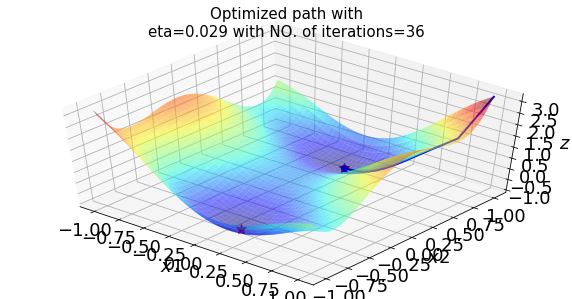

In [19]:
gdpv.gd_anim('pv')

# Experiment on step sizes

In [0]:
eta=np.linspace(0.01, 0.15, 100)
sp=[]
min_v=[]
for i in eta:
    result=gdpv.gd_pv_result(n_iter,starting_pt,i,tol)
    sp.append(result['speed'])
    min_v.append(result['min_value'])
# column=beta,row=eta
sp=np.asarray(sp)
min_v=np.asarray(min_v)

Text(0, 0.5, 'NO. of iteration')

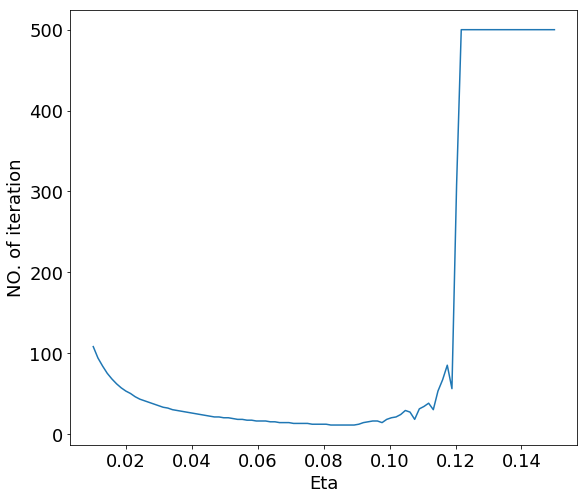

In [26]:
font = {'size': 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(eta, sp) 
ax1.set_xlabel('Eta')
ax1.set_ylabel('NO. of iteration')

In [0]:
n_iter=100
starting_pt=[0.,2.]
tol=1e-5

speed=[]
min_value=[]
x_op=[]
index_eta=[]
x_path=[]
min_path=[]
range_eta=np.arange(0.01,0.035,0.002)

for ii in range_eta:
        eta=ii
      
        result_opt=gd1.gd_pv_result(n_iter,starting_pt,eta,tol)
        speed.append(result_opt['speed'])
        min_value.append(result_opt['min_value'])
        x_op.append(result_opt['x_op'])
        x_path.append(result_opt['x_path'])
        min_path.append(result_opt['min_value_path'])

In [0]:
x_op

[[-0.086849061915795181, 0.7125041310587914],
 [-0.086933207733301265, 0.71227789338619496],
 [-0.086837892836541794, 0.71213006926262856],
 [-0.087035814116873458, 0.7121643883120542],
 [0.087123460162068234, -0.71221871997207231],
 [0.086915391192591659, -0.71222733273039907],
 [0.086862294114167293, -0.71227455545837581],
 [0.087043296869622547, -0.71233192516954069],
 [0.08712770617178596, -0.71235223704097461],
 [0.08732137188123465, -0.71236817299542843],
 [0.087170106636425465, -0.71231865408088979],
 [-0.087283777063142817, 0.71231219916122823],
 [-0.086861102291084652, 0.71232236456781184]]

In [0]:
print(speed)
print(range_eta)

[37, 34, 33, 36, 53, 29, 23, 20, 18, 17, 17, 26, 13]
[ 0.01   0.012  0.014  0.016  0.018  0.02   0.022  0.024  0.026  0.028
  0.03   0.032  0.034]


In [29]:
def f(eta):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection='3d', elev=60, azim=-50)
    x1 = np.linspace(-2,2, 50)
    x2 = np.linspace(-3,3 ,50)
    x1, x2 = np.meshgrid(x1, x2)
    t1=(4-2.1*x1**2+x1**4/3)*x1**2
    t2=x1*x2
    t3=(-4+4*x2**2)*x2**2
    z = t1+t2+t3

    ax.plot_surface(x1,x2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.5, linewidth=0)
    ax.plot([0.0898],[-0.7126],[-1.0316], 'r*', markersize=10)
    ax.plot([-0.0898],[0.7126],[-1.0316],'r*', markersize=10)
    
    x1p=np.array(x_path[list(range_eta).index(eta)])[:,0]
    x2p=np.array(x_path[list(range_eta).index(eta)])[:,1]
    zp=np.array(min_path[list(range_eta).index(eta)])
    speedp=np.array(speed[list(range_eta).index(eta)])
    
    
    ledg='eta='+str(eta)+' and NO. of iterations='+str(speedp)  
    line, = ax.plot([], [], 'b', lw=2,label=ledg)
    point, = ax.plot([], [], 'bo')

    
    
    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point
    def animate(i):
        line.set_data(x1p[:i], x2p[:i])
        line.set_3d_properties(zp[:i])
        point.set_data(x1p[i-1:i], x2p[i-1:i])
        point.set_3d_properties(zp[i-1:i])
        return line, point
    
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.array(x1p).shape[0], interval=200, 
                               repeat_delay=1,repeat=True, blit=True)
    ax.set_xlabel('$x1$')
    ax.set_ylabel('$x2$')
    ax.set_zlabel('$z$')
    ax.set_title('Optimized path with'+'\n'+ledg,fontsize='small')
    HTML(anim.to_html5_video())
    rc('animation', html='html5')
    return anim
        
interact(f,eta=(range_eta))
#interact(f,eta=(min(range_eta),max(range_eta),range_eta[1]-range_eta[0]))
         


interactive(children=(Dropdown(description='eta', options=(0.01, 0.012, 0.014, 0.016, 0.018000000000000002, 0.…

<function __main__.f>